LOKSABHA ELECTION-2024 :

Import Lib :

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset :

In [24]:
data = pd.read_csv("C:\\Users\\vishn\\Downloads\\election_results_2024.csv")
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared



Part with Highest and Lowest Margin of Victory :

In [25]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]


Plot Number of Seats Won by each Party :

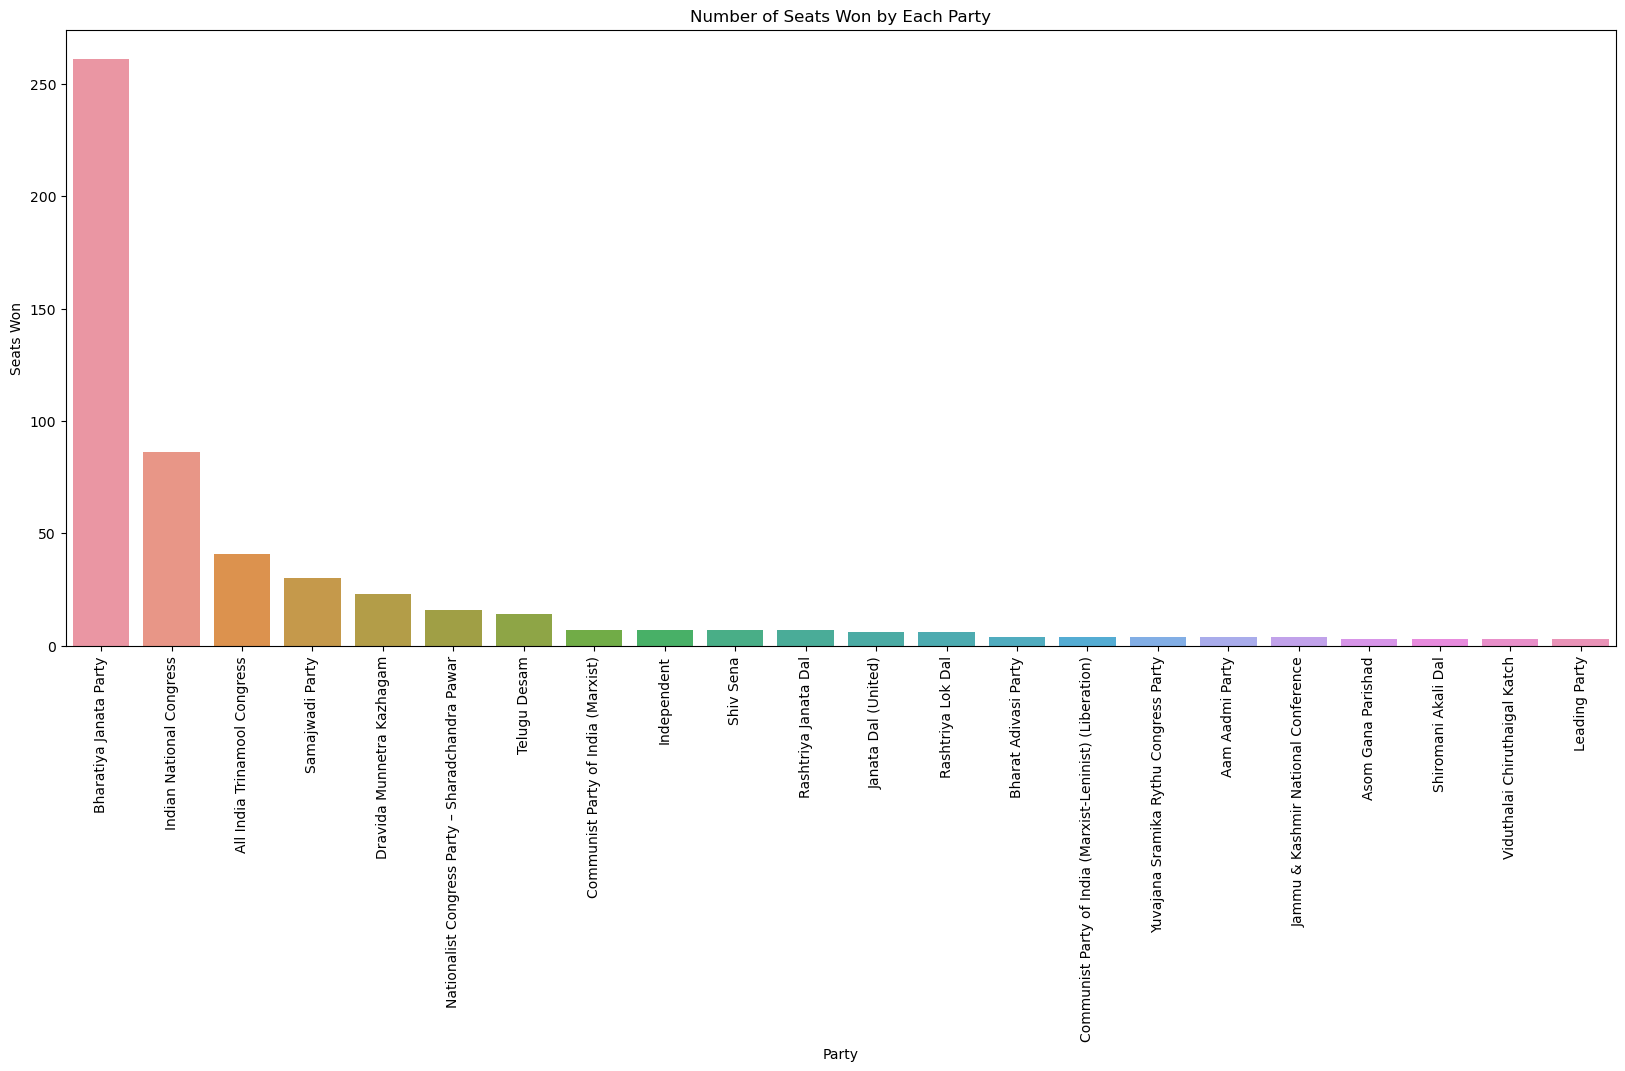

In [26]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()
# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values)
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()


Votes Distribution by Party :

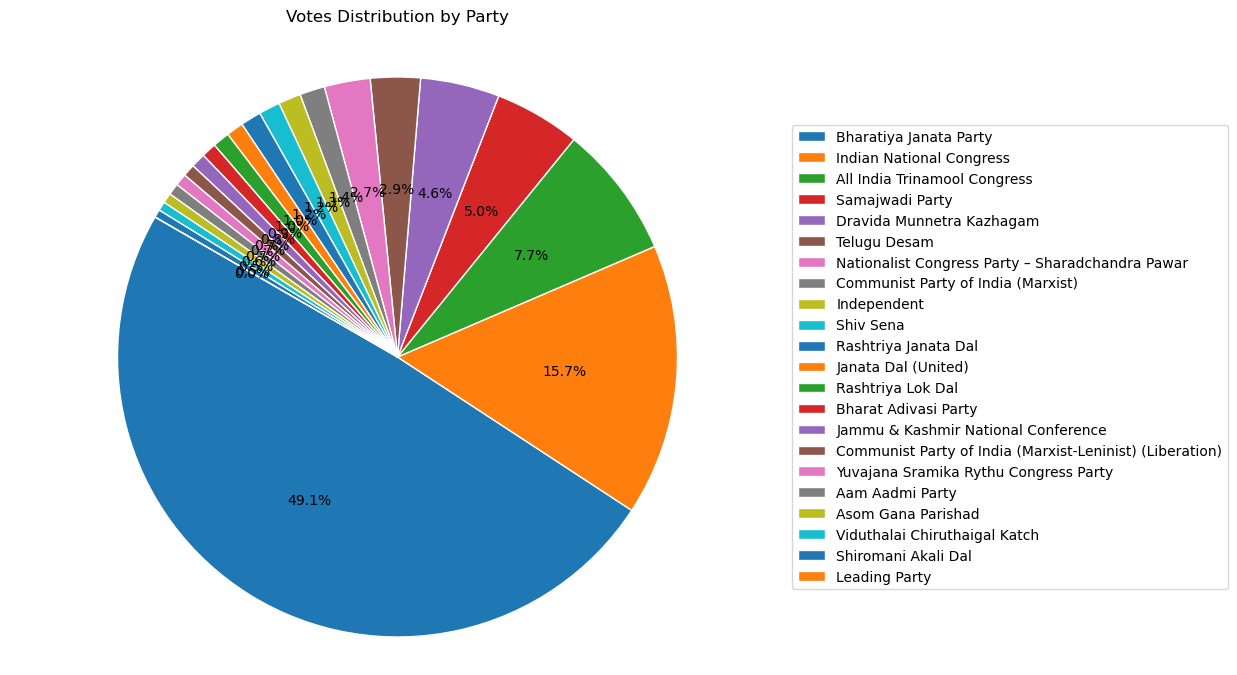

In [27]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=150, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()


Top 10 Trailing parties by votes :

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'Biju Janata Dal'),
  Text(3, 0, 'Samajwadi Party'),
  Text(4, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(5, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(6, 0, 'All India Trinamool Congress'),
  Text(7, 0, 'Aam Aadmi Party'),
  Text(8, 0, 'Communist Party of India (Marxist)'),
  Text(9, 0, 'Rashtriya Janata Dal')])

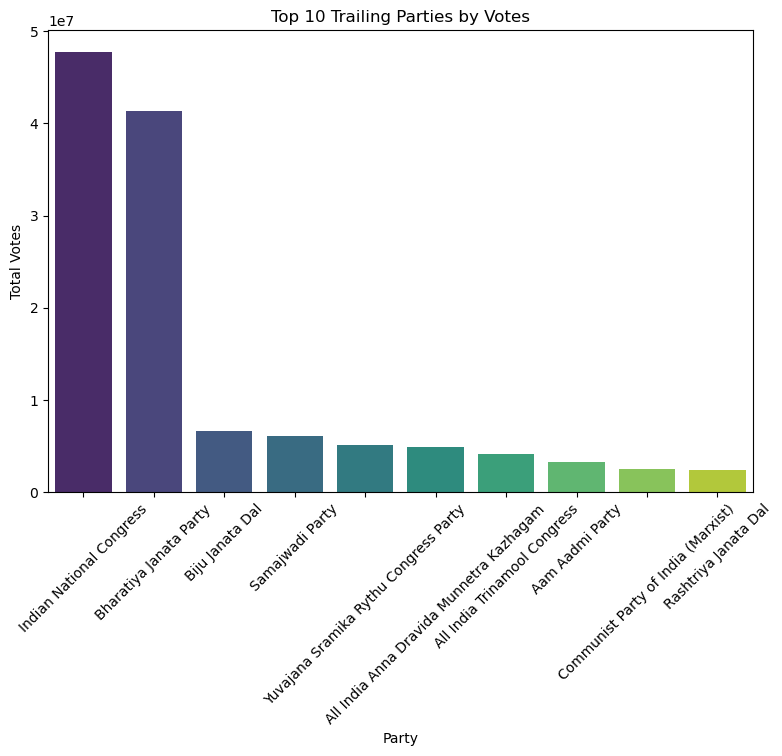

In [28]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()
plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)


Top 10 Trailing Parties by Seats :

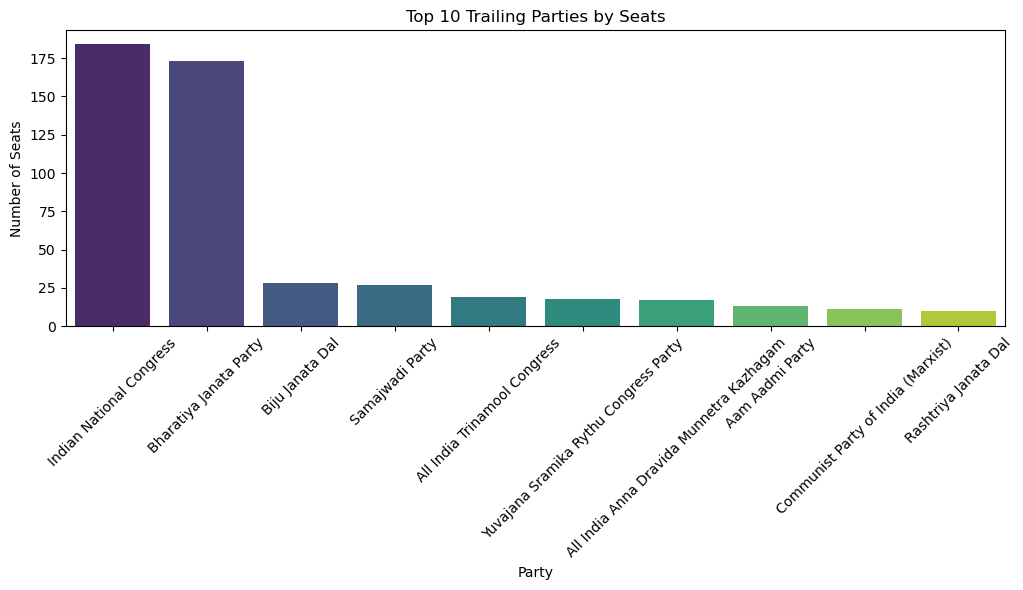

In [29]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()